# Demonstration of StateSpacePTA.jl


This notebook demonstrates the use of `StateSpacePTA.jl` to generate some synthetic pulsar timing data and then use a UKF to recover the underlying state.


## 1. Single run example

In [1]:
using Revise
using StateSpacePTA
using DoubleFloats

In [3]:
outputs = UKF(NF=Double64,h=1e-8);

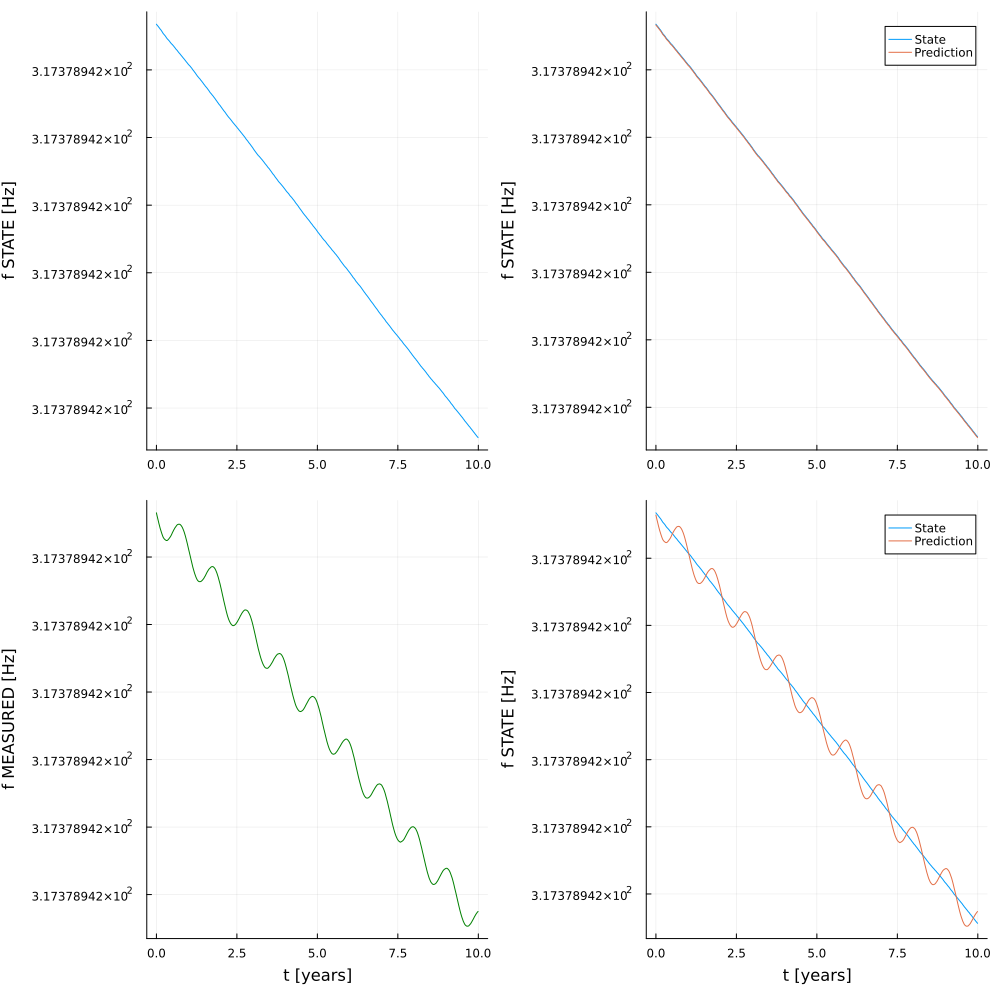

In [4]:
plotter(outputs["time"],outputs["state"],outputs["measurement"],outputs["model_predictions"],outputs["null_predictions"],15)

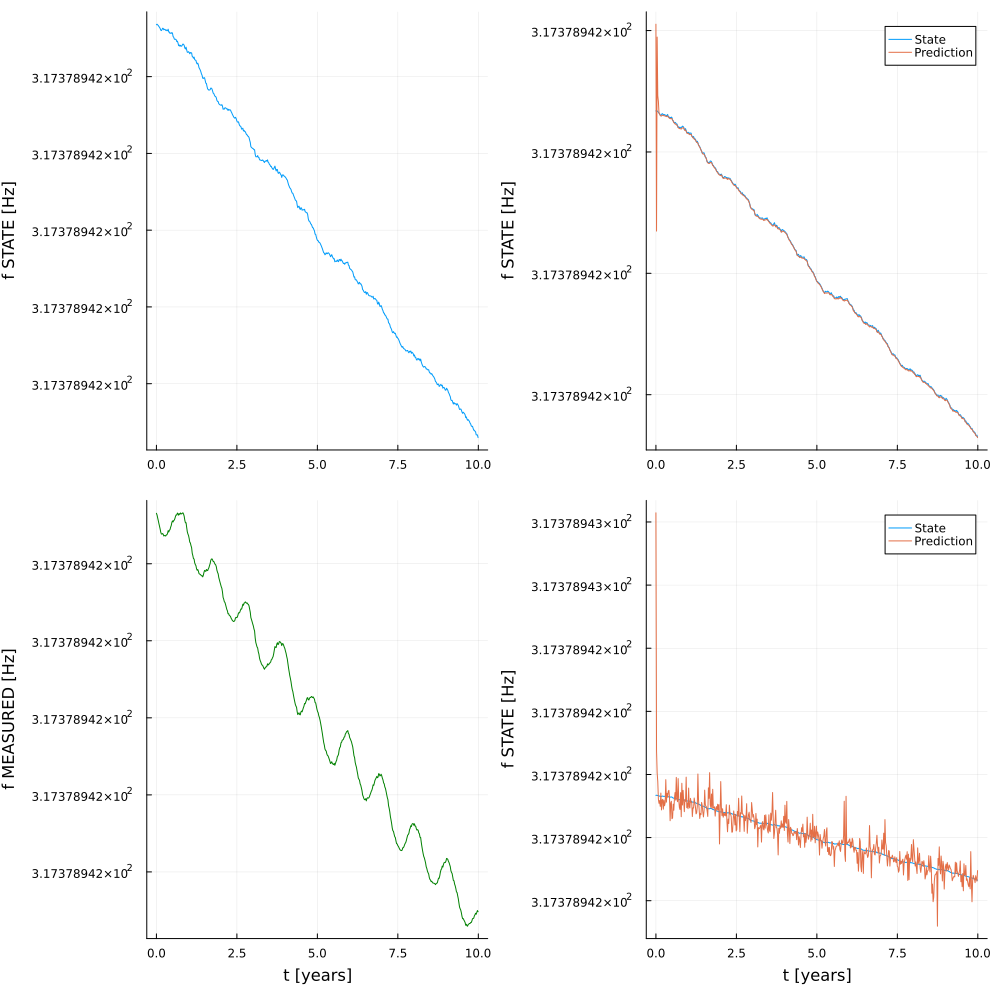

In [34]:
outputs = UKF(NF=Float64,h=1e-8,σp=1e-12);
plotter(outputs["time"],outputs["state"],outputs["measurement"],outputs["model_predictions"],outputs["null_predictions"],15)

## 2. How does detectability vary with h?

In [27]:
using Plots 



function iterate(lower_limit, upper_limit,N,σp)

  
    h = 10 .^ range(lower_limit, stop=upper_limit, length=N)

    data = zeros((N,4))
    i = 1
    for hi in h 
    
        outputs = UKF(NF=Double64,h=hi,σp=σp);

        TS=outputs["TS"]

        model_predictions = outputs["model_predictions"]
        null_predictions = outputs["null_predictions"]
        states = transpose(outputs["state"][:,:])

        model_error = median(abs.(model_predictions-states))
        null_error = median(abs.(null_predictions-states))


        data[i,1] = hi
        data[i,2] = TS
        data[i,3] = model_error
        data[i,4] = null_error
        i +=1

    end 


return data

end 


function plot_detection_vs_strain(d,tolerance,title)

    h = d[:,1]
    TS = d[:,2]

    positive_idx= (TS .> 0) #Indeces where the test statistic is positive. This is good. 
    negative_idx= (TS .< 0) #Indeces where the test statistic is positive. This is bad. 

   
    hplot, TSplot = h[positive_idx],TS[positive_idx]




    plt = plot(hplot, TSplot,xaxis=:log,yaxis=:log,xlabel="h", ylabel="TS",title=title,xticks = 10)
    scatter!(h[negative_idx],abs.(TS[negative_idx]))
    

    hline!([tolerance], color=:grey,linestyle=:dash,legend=false)

    
    filter_condition = (TSplot .> tolerance)

    x = hplot[filter_condition]
    y = TSplot[filter_condition]
    scatter!(x,y,color=:darkred)

    critical_value,idx = findmin(y)

    xc,yc = x[idx], y[idx]
   

    
    
    vline!([xc], color=:grey,linestyle=:dash,legend=false)
    println("Critical value: ", xc, " ", yc)

    display(plt)


end 

function plot_error_vs_strain(d,title)

    h = d[:,1]
    model_error = d[:,3]
    null_error = d[:,4]

    println(model_error)
    plt = plot(h, model_error ,xaxis=:log,yaxis=:log,xlabel="h", ylabel="δ",title=title,label="model")
    plot!(h,null_error,label="H0")
    
    # scatter!(h[negative_idx],abs.(TS[negative_idx]))
    

    # hline!([tolerance], color=:grey,linestyle=:dash,legend=false)

    
    # filter_condition = (TSplot .> tolerance)

    # x = hplot[filter_condition]
    # y = TSplot[filter_condition]
    # scatter!(x,y,color=:darkred)

    # critical_value,idx = findmin(y)

    # xc,yc = x[idx], y[idx]
   

    
    
    # vline!([xc], color=:grey,linestyle=:dash,legend=false)
    # println("Critical value: ", xc, " ", yc)

    display(plt)


end 




plot_error_vs_strain (generic function with 1 method)

In [29]:
h_low = -18
h_high = -8
N = 40

 
example_data_0 = iterate(h_low, h_high,N,0.0);
example_data_1 = iterate(h_low, h_high,N,1e-13);

In [32]:
using JLD 
save("../data/example_demo_data_new.jld", "example_data_0", example_data_0, "example_data_1", example_data_1)

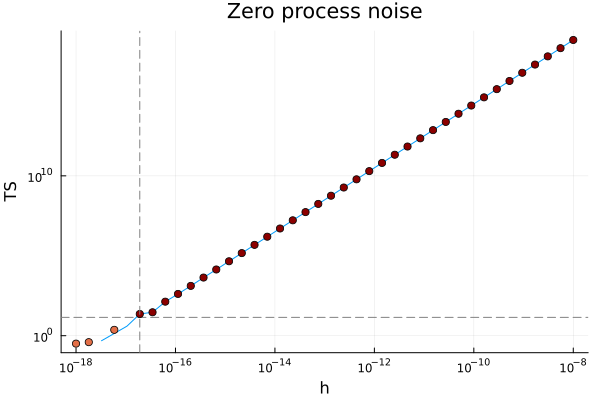

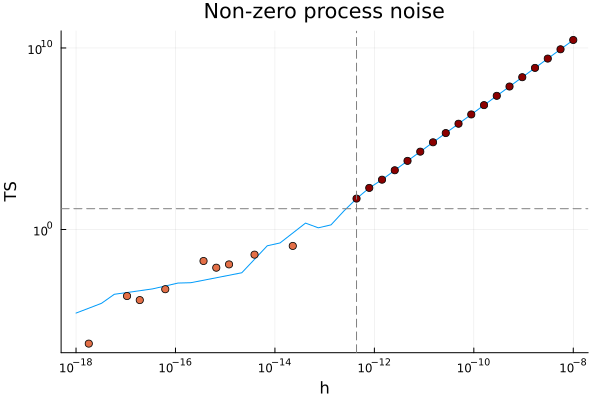

Critical value: 1.9144819761699535e-17 22.844057567144123
Critical value: 4.37547937507418e-13 50.22353744578596


In [31]:
plot_detection_vs_strain(example_data_0,14,"Zero process noise")
plot_detection_vs_strain(example_data_1,14, "Non-zero process noise")

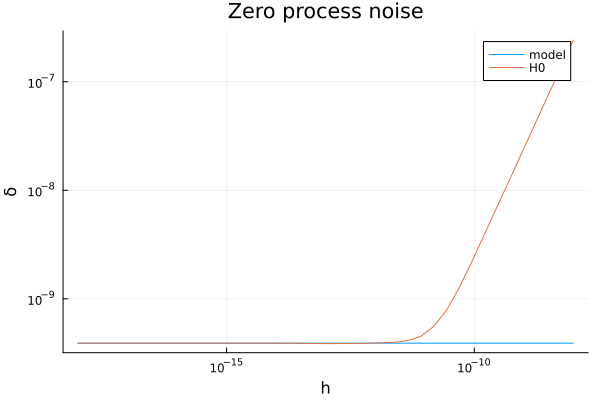

[3.899793319906522e-10, 3.8997908560480483e-10, 3.8998637743134267e-10, 3.899967180214598e-10, 3.899751819964743e-10, 3.899764322655785e-10, 3.8997678373789183e-10, 3.8998727430086113e-10, 3.89986196313419e-10, 3.899855181035175e-10, 3.899811482548127e-10, 3.8998117188597735e-10, 3.8998424625382173e-10, 3.899726321312155e-10, 3.8997884970126737e-10, 3.8998142448544746e-10, 3.899777954405093e-10, 3.899792906859018e-10, 3.89988310075021e-10, 3.899809219916282e-10, 3.8998373145822156e-10, 3.8999027594303206e-10, 3.899839663667403e-10, 3.8998563732342803e-10, 3.8998334259569496e-10, 3.8998452549634236e-10, 3.8999341285870606e-10, 3.8998038196109243e-10, 3.8998656677993263e-10, 3.8998436304889894e-10, 3.899733635500033e-10, 3.899802871250832e-10, 3.899828701797114e-10, 3.899882061371795e-10, 3.899939143363895e-10, 3.8998648102591897e-10, 3.8998126849314566e-10, 3.8998475292141306e-10, 3.899868802778829e-10, 3.899830758308023e-10]


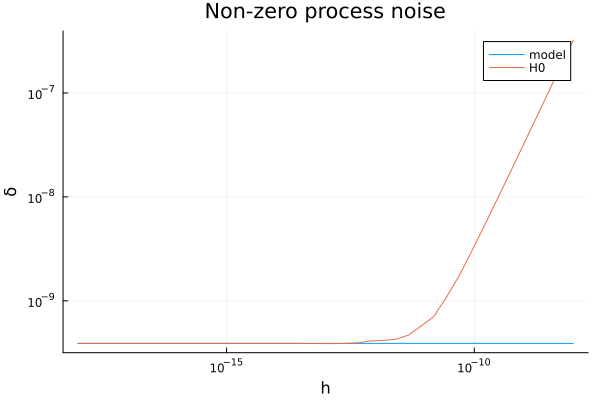

[3.8998209635286967e-10, 3.899849980241813e-10, 3.899805060116955e-10, 3.8999128321435053e-10, 3.899824103477003e-10, 3.899789977878126e-10, 3.899827630603867e-10, 3.8998007114684103e-10, 3.899807705332227e-10, 3.8998062449800143e-10, 3.8997334813806285e-10, 3.8998269210016057e-10, 3.8998053445401063e-10, 3.8996996445995973e-10, 3.899815460948244e-10, 3.899808811940565e-10, 3.899745454086153e-10, 3.899823398586604e-10, 3.899858664883607e-10, 3.899870133762704e-10, 3.8998297333858427e-10, 3.899881060004028e-10, 3.899830458851262e-10, 3.89994796767701e-10, 3.899903134561017e-10, 3.8998583754375406e-10, 3.8997121735104576e-10, 3.899758890793367e-10, 3.899885957069147e-10, 3.8998521661063046e-10, 3.899783811598071e-10, 3.8999795322741304e-10, 3.899851950501882e-10, 3.899859322638971e-10, 3.8998554035427965e-10, 3.899887982179663e-10, 3.8998848013909147e-10, 3.899823323653485e-10, 3.899856882389629e-10, 3.8998940246774393e-10]


In [33]:
plot_error_vs_strain(example_data_0,"Zero process noise")
plot_error_vs_strain(example_data_1, "Non-zero process noise")

---


## Scratch space

In [211]:

function iterate2(lower_limit, upper_limit,N,σp)

  
    h = 10 .^ range(lower_limit, stop=upper_limit, length=N)

    data = zeros((N,4))
    i = 1
    for hi in h 
    
        outputs = UKF(NF=Double64,h=hi,σp=σp);

        TS=outputs["TS"]

        model_predictions = outputs["model_predictions"]
        null_predictions = outputs["null_predictions"]
        states = transpose(outputs["state"][:,:])

        model_error = median(abs.(model_predictions-states))
        null_error = median(abs.(null_predictions-states))


        data[i,1] = hi
        data[i,2] = TS
        data[i,2] = model_error
        data[i,2] = null_error
        i +=1

    end 


return data

end 





function plot_detection_vs_strain2(d,tolerance,title)

    h = d[:,1]
    TS = d[:,2]
    model_error = d[:,3]
    null_error = d[:,4]


    positive_idx= (TS .> 0) #Indeces where the test statistic is positive. This is good. 
    negative_idx= (TS .< 0) #Indeces where the test statistic is positive. This is bad. 

   
    hplot, TSplot = h[positive_idx],TS[positive_idx]


    #plot(x,y,layout=grid(2,1, heights=(0.8,0.2)), size=(450,600),legend=false,link = :x)
    #plot!(ylabel=L"y (r_h)",subplot=1)

    plt = plot(hplot, TSplot,layout=grid(2,1, heights=(0.5,0.5)),size=(600,600),xlabel="h", ylabel="TS",title=title)
    scatter!(h[negative_idx],abs.(TS[negative_idx]),subplot=1)
    

    hline!([tolerance], color=:grey,linestyle=:dash,legend=false,subplot=1)

    

    plot!(h,model_error,subplot=2)
    plot!(h,null_error,subplot=2)


    # filter_condition = (TSplot .> tolerance)

    # x = hplot[filter_condition]
    # y = TSplot[filter_condition]
    # scatter!(x,y,color=:darkred,subplot=1)

    # critical_value,idx = findmin(y)

    # xc,yc = x[idx], y[idx]
   

    
    
    # vline!([xc], color=:grey,linestyle=:dash,legend=false,subplot=1)
    # println("Critical value: ", xc, " ", yc)

    display(plt)


end 



plot_detection_vs_strain2 (generic function with 1 method)

In [3]:
outputs = UKF(NF=Float64,h=1e-8,σp=1e-13);

UndefVarError: UndefVarError: UKF not defined

In [198]:
h_low = -18
h_high = -8
N = 5

 
#example_data_N0 = iterate2(h_low, h_high,N,0.0);
example_data_N1 = iterate2(h_low, h_high,N,1e-11);


In [200]:
example_data_N1

5×4 Matrix{Float64}:
 1.0e-18      3.8999e-10   0.0  0.0
 3.16228e-16  3.89986e-10  0.0  0.0
 1.0e-13      3.88118e-10  0.0  0.0
 3.16228e-11  1.20976e-9   0.0  0.0
 1.0e-8       3.23385e-7   0.0  0.0

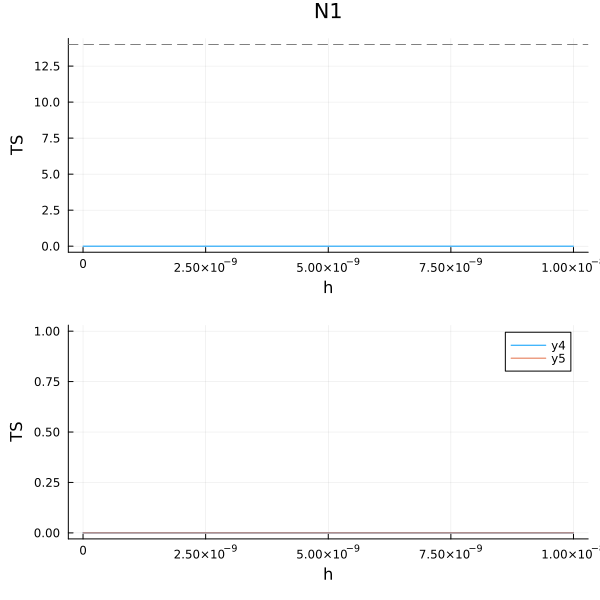

In [212]:
#plot_detection_vs_strain(example_data_N0,14, "N0")
plot_detection_vs_strain2(example_data_N1,14, "N1")

In [2]:
example_data_N1

UndefVarError: UndefVarError: example_data_N1 not defined